# Embedding space analysis

The goal here is to analyze the embedding space of trained models. 

We will visualize the embeddings of the words in the vocabulary, and also the embedding of the titles.

I hope that using UMAP, we can see some interesting clusters in the embedding space.

Also, thanks to cosine similarity, we will create a recommendation system based on the embeddings.

In [42]:
import torch 
from classifier.article_dataset import ArticleDataset
from torch.utils.data import DataLoader
from classifier.models.mlp_classifier import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# load a trained model 
def load_checkpoint(checkpoint_path, device):
    checkpoint = torch.load(checkpoint_path, map_location=device)
    hyperparams = checkpoint['hyperparameters']
    
    model = MLPClassifier(
        hyperparams['vocab_size'],
        hyperparams['embedding_dim'],
        hyperparams['hidden_dim'],
        hyperparams['num_classes'],
        hyperparams['num_hidden_layers']
    )
    model.load_state_dict(checkpoint['model_state_dict'])
    model.to(device)
    model.eval()  # evaluation mode
    return model, hyperparams


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint_path = "classifier/trained_models/categories.pth"

model, hyperparams = load_checkpoint(checkpoint_path, device)
dataset = ArticleDataset("classifier/data/articles.csv")
filters = {
    "min_papers" : 5000, 
    "min_freq": 2,
}
dataset.apply_filters(filters)

In [3]:
print(hyperparams)
print(len(model))

{'vocab_size': 58648, 'embedding_dim': 64, 'hidden_dim': 512, 'num_classes': 19, 'num_hidden_layers': 1}
3796499


In [4]:
idx = torch.tensor(50000)
print(model.embedding(idx))

tensor([ 0.4192,  0.2492, -0.9996, -1.3834,  0.8038,  0.9765, -0.5236, -0.9779,
        -1.1978,  0.9151,  0.6610, -0.6554, -0.4981, -2.1693, -1.5254,  0.0645,
        -0.0669,  0.0385, -0.0172,  0.8518, -0.0905,  0.3258, -1.7158,  0.7587,
         0.8819,  1.8969,  0.3941, -0.3140,  1.0497,  0.1160, -0.2873,  1.1612,
         0.5517, -0.5019,  1.3672, -0.5876, -2.4732,  0.6900,  0.2070, -0.4704,
        -0.8544, -1.2511, -0.4193,  1.0197,  0.8197,  0.2553, -0.6646,  0.9042,
         1.0095, -1.8900, -0.5734, -0.9348, -0.0092, -0.5611, -0.1394, -0.7925,
         1.0775, -0.1386, -1.3990, -0.6253, -1.0835,  1.3217,  0.6802,  0.7872],
       grad_fn=<EmbeddingBackward0>)


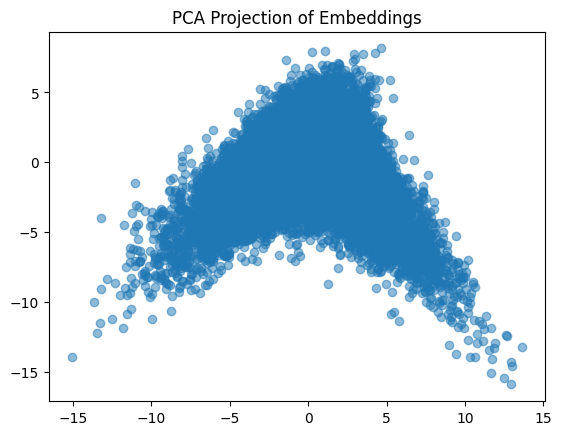

In [5]:
# Let's first perform a PCA before ressorting to better visualizations
from sklearn.decomposition import PCA

emb = model.embedding.weight.detach()
pca = PCA(n_components=2)
reduced_emb = pca.fit_transform(emb.cpu().numpy())

plt.scatter(reduced_emb[:, 0], reduced_emb[:, 1], alpha=0.5)
plt.title("PCA Projection of Embeddings")
plt.show()

In [6]:
def get_word_from_coordonates(coordonates, points):
    distances = ((points - coordonates)**2).sum(axis=1)**0.5
    closest_idx = distances.argmin()
    return dataset.itow[closest_idx]

coordonates = [-15,-15]
word = get_word_from_coordonates(coordonates, reduced_emb)
print(f"closest point to {coordonates} is {word}")

closest point to [-15, -15] is fuzzing


In [7]:
# Vertical 
x = np.linspace(0, 0, 20)
y = np.linspace(-20, 10, 20)

for x,y in zip(x,y):
    coord = [x,y]
    word = get_word_from_coordonates(coord, reduced_emb)
    print(f"closest point to {x.item(),y.item()} is {word}")

closest point to (0.0, -20.0) is imath
closest point to (0.0, -18.42105263157895) is imath
closest point to (0.0, -16.842105263157894) is imath
closest point to (0.0, -15.263157894736842) is queer
closest point to (0.0, -13.68421052631579) is queer
closest point to (0.0, -12.105263157894736) is queer
closest point to (0.0, -10.526315789473685) is queer
closest point to (0.0, -8.947368421052632) is queer
closest point to (0.0, -7.368421052631579) is tor
closest point to (0.0, -5.789473684210526) is sha
closest point to (0.0, -4.210526315789473) is logics
closest point to (0.0, -2.6315789473684212) is hours
closest point to (0.0, -1.05263157894737) is revisionist
closest point to (0.0, 0.526315789473685) is habitability
closest point to (0.0, 2.1052631578947363) is catchments
closest point to (0.0, 3.684210526315791) is heom
closest point to (0.0, 5.2631578947368425) is nucleon
closest point to (0.0, 6.842105263157894) is radiological
closest point to (0.0, 8.421052631578949) is ct
close

In [8]:
# horizontal 
x = np.linspace(-15, 15, 20)
y = np.linspace(-5, -5, 20)

for x,y in zip(x,y):
    coord = [x,y]
    word = get_word_from_coordonates(coord, reduced_emb)
    print(f"closest point to {x.item(),y.item()} is {word}")

closest point to (-15.0, -5.0) is spanner
closest point to (-13.421052631578947, -5.0) is spanner
closest point to (-11.842105263157894, -5.0) is cnf
closest point to (-10.263157894736842, -5.0) is refactoring
closest point to (-8.68421052631579, -5.0) is handwritten
closest point to (-7.105263157894736, -5.0) is veracity
closest point to (-5.526315789473685, -5.0) is carla
closest point to (-3.947368421052632, -5.0) is spinnaker
closest point to (-2.3684210526315788, -5.0) is owners
closest point to (-0.7894736842105257, -5.0) is disjunctive
closest point to (0.7894736842105274, -5.0) is ap
closest point to (2.3684210526315788, -5.0) is wr
closest point to (3.94736842105263, -5.0) is szlenk
closest point to (5.526315789473685, -5.0) is meromorphic
closest point to (7.105263157894736, -5.0) is subsemigroups
closest point to (8.684210526315791, -5.0) is raviart
closest point to (10.263157894736842, -5.0) is turnpike
closest point to (11.842105263157894, -5.0) is turnpike
closest point t

I hardly gain any insights except that it takes a banana shaped curve

Let's use UMAP

In [9]:
import umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_emb = reducer.fit_transform(emb.cpu().numpy())

c:\Users\cheri\nsi\M1\Arxiv-ML\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\cheri\nsi\M1\Arxiv-ML\env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\cheri\nsi\M1\Arxiv-ML\env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


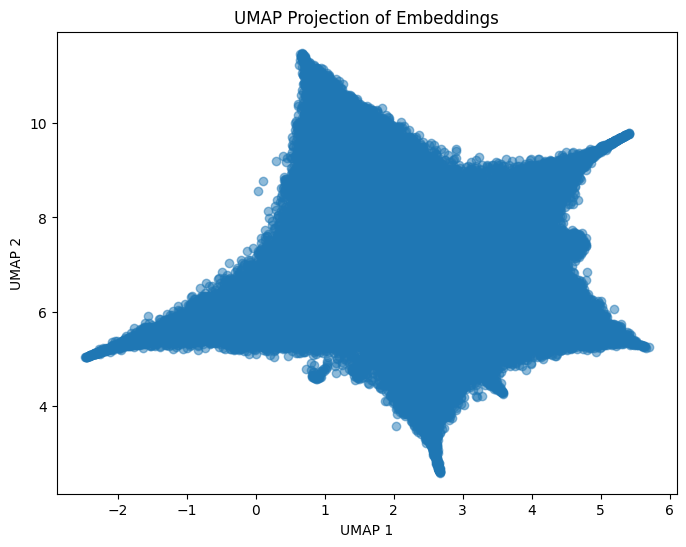

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(umap_emb[:, 0], umap_emb[:, 1], alpha=0.5)
plt.title("UMAP Projection of Embeddings")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

In [11]:
# horizontal 
x = [-3, 1, 2.7, 5.4, 6]
y = [5, 15, 0, 10, 5]

for x,y in zip(x,y):
    coord = [x,y]
    word = get_word_from_coordonates(coord, umap_emb)
    print(f"closest point to {x,y} is {word}")

closest point to (-3, 5) is harnack
closest point to (1, 15) is datacenter
closest point to (2.7, 0) is fese
closest point to (5.4, 10) is illustristng
closest point to (6, 5) is tokamaks


In [12]:
def get_k_nearest_words(coord, points, k):
    coord = np.array(coord)
    distances = np.linalg.norm(points - coord, axis=1)
    nearest_indices = np.argsort(distances)[:k]
    return [dataset.itow[idx] for idx in nearest_indices]

coord = [6,5] # coords of "tokamaks"
words = get_k_nearest_words(coord, umap_emb, 10)
words

['tokamaks',
 'spanwise',
 'stellarators',
 'wakefields',
 'divertor',
 'metalenses',
 'scrape',
 'undulator',
 'photoinjector',
 'tokamak']

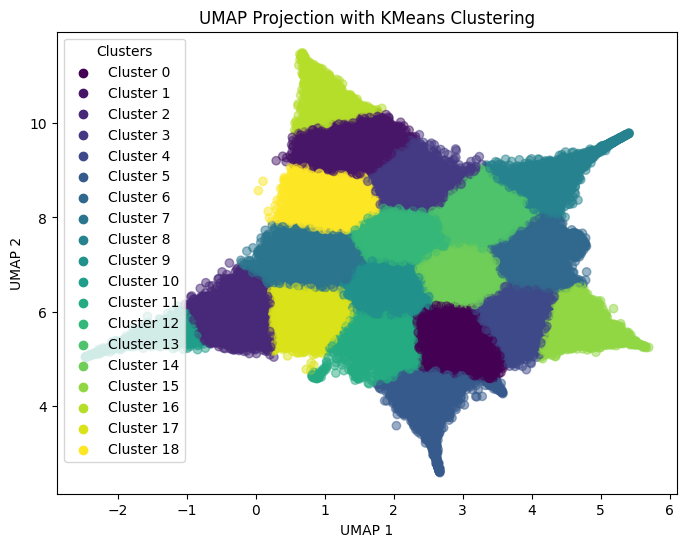

In [13]:
from sklearn.cluster import KMeans

n_clusters = 19

# Perform KMeans clustering on the UMAP embeddings
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(umap_emb)

plt.figure(figsize=(8, 6))
plt.scatter(umap_emb[:, 0], umap_emb[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title("UMAP Projection with KMeans Clustering")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
unique_clusters = np.unique(clusters)
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
for i, uc in enumerate(unique_clusters):
    plt.scatter([], [], color=colors[i], label=f"Cluster {uc}")
plt.legend(title="Clusters")
plt.show()

In [14]:

for cl in unique_clusters:
    cluster_indices = np.where(clusters == cl)[0] # returns the indices (from clusters) that correspond to the current cluster
    words = [dataset.itow[idx] for idx in cluster_indices[:20]]
    print(f"Cluster {cl}: {', '.join(words)}")

Cluster 0: transition, relaxation, quantum, energies, many, body, particle, statistics, correlated, dynamics, hamiltonians, theory, theoretical, entanglement, away, mechanics, spin, temperature, ansatz, dissipative
Cluster 1: unveiling, get, adam, semantic, overfitting, transformer, decoders, algorithms, scalable, training, leveraging, algorithmic, task, circuits, transformers, fading, memorization, foundation, concept, ai
Cluster 2: moduli, estimates, combinatorial, slowly, recurrence, unbounded, numbers, coincidence, ergodicity, maximal, pde, singular, phaseless, sharp, asymptotically, conductive, subharmonic, hypercubes, amp, mathbb
Cluster 3: beyond, memories, deep, learning, assemblies, system, contextual, visual, similarity, crisis, parallel, accelerating, efficient, prediction, living, re, pluripotent, world, breaking, predict
Cluster 4: molecular, modes, les, states, physics, charged, ab, chemistry, tungsten, contagion, liquid, percolation, wavefunctions, fock, kinetic, decoher

### Now it's getting really interesting

UMAP preserves local structure, so we can see the clusters of words that are similar to each other.

For instance, "quantum, energies, many, body, particle" are all in the same cluster and same for "adam, semantic, overfitting, transformer, decoders, algorithms, scalable, training". 

we can confortably say that our classifier learned a coherent representation of the words in the embedding space and UMAP is a great tool to visualize it.

### Let's do the same for the titles

In [19]:
# a title is a sequence of words 
# the sequence is averaged along the temporal axis to create an embedding of the same size as a word
# i.e pooling avg 

# let's embed the titles 
# first we need to retrieve them using the dataloader 
from torch.nn.utils.rnn import pad_sequence

def custom_collate(batch, pad_value=0):
    sequences, labels = zip(*batch)
    # Padding sequences to obtain tensors of uniform size
    padded_sequences = pad_sequence(sequences, batch_first=True, padding_value=pad_value)
    labels = torch.tensor(labels)
    return padded_sequences, labels

dataloader = DataLoader(dataset, batch_size=32, collate_fn=custom_collate, shuffle=True)

# useless but wanted to remind myself how do dataloaders work
for batch, (padded_sequences, labels) in enumerate(dataloader): 
    for t, (seq, label) in enumerate(zip(padded_sequences, labels)):
        title = [dataset.itow[seq[i].item()] for i in range(len(seq)) if seq[i].item() != 0]
        cat = dataset.itoc[label.item()]
        print(title, cat)
    break

['unlocking', 'the', 'general', 'relationship', 'between', 'energy', 'and', 'entanglement', 'spectra', 'via', 'the', 'wormhole', 'effect'] cond-mat
['towards', 'coordinated', 'bandwidth', 'adaptations', 'for', 'hundred', 'scale', '3d', 'tele', 'immersive', 'systems'] cs
['oseen', 'flow', 'in', 'paint'] physics
['complete', 'monotonicity', 'of', 'a', 'difference', 'between', 'the', 'exponential', 'and', 'trigamma', 'functions'] math
['the', 'complexity', 'of', 'sparse', 'tensor', 'pca'] cs
['an', 'irs', 'assisted', 'secure', 'dual', 'function', 'radar', 'communication', 'system'] eess
['abelian', 'subcategories', 'of', 'triangulated', 'categories', 'induced', 'by', 'simple', 'minded', 'systems'] math
['stopping', 'rules', 'for', 'gradient', 'method', 'for', 'saddle', 'point', 'problems', 'with', 'polyak', 'condition'] math
['how', 'much', 'does', 'ai', 'impact', 'development', 'speed', 'an', 'enterprise', 'based', 'randomized', 'controlled', 'trial'] cs
['connecting', 'the', 'timescales

In [37]:
# we now use the dataloader to embed the titles using batches (bc the dataset is way too big)
def embed_all_titles_in_batches(device="cpu", batch_size=128):
    model.eval()
    all_emb = []

    with torch.no_grad():
        for padded_sequences, _ in dataloader:
            # we use the forward code 
            emb = model.embedding(padded_sequences)  # [total_titles, seq_len, embedding_dim]
            mask = (padded_sequences != 0).unsqueeze(-1).float()
            emb = emb * mask
            sum_emb = emb.sum(dim=1)
            lengths = mask.sum(dim=1)
            avg_emb = sum_emb / lengths.clamp(min=1)  # [total_titles, embedding_dim]
            all_emb.append(avg_emb.cpu())

    return torch.cat(all_emb, dim=0)

emb_titles = embed_all_titles_in_batches()

In [ ]:
emb_titles.shape # [total_titles, emb_dim]

torch.Size([1230513, 64])

In [39]:
# now that we have our embedded titles, we can reproduce what we did for the words 

# let's skip the PCA and directly plot the UMAP 
umap_emb = reducer.fit_transform(emb_titles.cpu().numpy())

c:\Users\cheri\nsi\M1\Arxiv-ML\env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


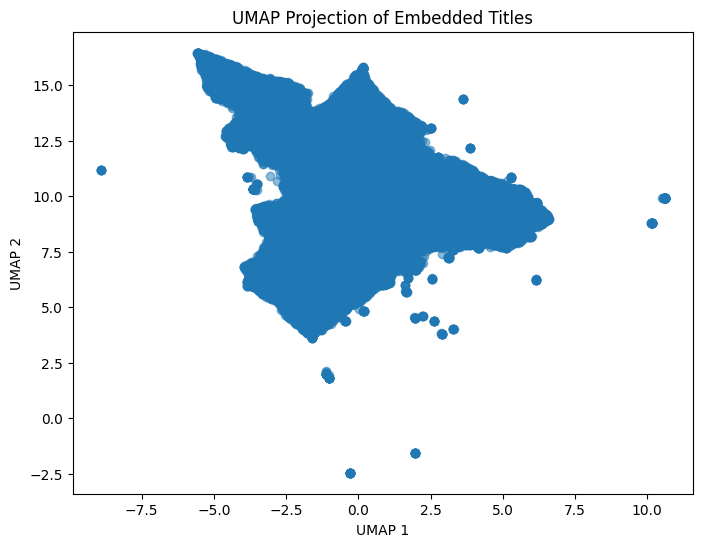

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(umap_emb[:, 0], umap_emb[:, 1], alpha=0.5)
plt.title("UMAP Projection of Embedded Titles")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

In [43]:
# as it takes approximatly 45min to perform the UMAP, we save it in a csv file
df = pd.DataFrame(umap_emb)
df.to_csv("embedding_umap.csv", index=False)